Питон предоставляет удобный клиент для работы с бд, так что будем работать тут


Импорт библиотек

In [1]:
import redis
import time
from datetime import datetime
from matplotlib import pyplot as plt
import numpy as np
from redis.cluster import RedisCluster as RC

Инициализируем базу

In [3]:
r = redis.Redis(host='localhost', port = 6379, db=0)

Наша база является key-value.
Проверим работу

In [6]:
r.set('key', 'value')

True

In [8]:
r.get('key')

b'value'

Как видим бд работает

Рассмотрим вначале строки.

Небольшая справка

Строки - это самый базовый вид значений Redis. Строки Redis являются бинарными, это означает, что строка Redis может содержать любой тип данных, например, изображение JPEG или сериализованный объект Ruby.

Длина строкового значения может составлять не более 512 мегабайт.

In [11]:
SIZE = 10**6

Посмотрим вставку на миллион элементов

In [24]:
StringRedis = redis.Redis(host='localhost', port = 6379, db=0)

In [25]:
string_set_times = []
string_get_times = []

In [26]:
start_time = datetime.now()
for i in range(SIZE):
    if i % 100000 == 0:
        print(f'Iteration {i}')
        string_set_times.append(datetime.now() - start_time)
    StringRedis.set(f'key_{i}', f'value_{i}')
print(datetime.now() - start_time)

Iteration 0
Iteration 100000
Iteration 200000
Iteration 300000
Iteration 400000
Iteration 500000
Iteration 600000
Iteration 700000
Iteration 800000
Iteration 900000
0:02:19.366913


In [27]:
start_time = datetime.now()
for i in range(SIZE):
    if i % 100000 == 0:
        print(f'Iteration {i}')
        string_get_times.append(datetime.now() - start_time)
    StringRedis.get(f'key_{i}')
print(datetime.now() - start_time)

Iteration 0
Iteration 100000
Iteration 200000
Iteration 300000
Iteration 400000
Iteration 500000
Iteration 600000
Iteration 700000
Iteration 800000
Iteration 900000
0:02:23.346025


Рассмотрим хэши.

Хеши Redis представляют собой карты между строковыми полями и строковыми значениями, поэтому они являются идеальным типом данных для представления объектов (например, пользователя с несколькими полями, такими как имя, фамилия, возраст и так далее):

Хэш с несколькими полями (где несколько означает до ста или около того) хранится таким образом, что занимает очень мало места, поэтому вы можете хранить миллионы объектов в небольшом экземпляре Redis.

Хотя хэши используются в основном для представления объектов, они способны хранить множество элементов, поэтому вы можете использовать хэши и для многих других задач.


In [28]:
HashRedis = redis.Redis(host='localhost', port = 6379, db=0)

In [ ]:
hash_set_times = []
hash_get_times = []

In [30]:
start_time = datetime.now()
for i in range(SIZE):
    if i % 100000 == 0:
        print(f'Iteration {i}')
        hash_set_times.append(datetime.now() - start_time)
    HashRedis.hset("NumberVsString", f"{i}", f"value_{i}")
print(datetime.now() - start_time)

Iteration 0
Iteration 100000
Iteration 200000
Iteration 300000
Iteration 400000
Iteration 500000
Iteration 600000
Iteration 700000
Iteration 800000
Iteration 900000
0:02:21.319539


In [31]:
start_time = datetime.now()
for i in range(SIZE):
    if i % 100000 == 0:
        print(f'Iteration {i}')
        hash_get_times.append(datetime.now() - start_time)
    HashRedis.hget("NumberVsString", f"{i}")
print(datetime.now() - start_time)

Iteration 0
Iteration 100000
Iteration 200000
Iteration 300000
Iteration 400000
Iteration 500000
Iteration 600000
Iteration 700000
Iteration 800000
Iteration 900000
0:02:20.809076


Перейдем к сортированным множествам.

Сортированные наборы Redis - это, как и наборы Redis, неповторяющиеся коллекции строк. Разница в том, что каждый член сортированного набора ассоциируется с оценкой, которая используется для упорядочивания сортированного набора от наименьшей до наибольшей оценки. В то время как члены уникальны, оценки могут повторяться.

С помощью сортированных множеств можно добавлять, удалять или обновлять элементы очень быстро (за время, пропорциональное логарифму количества элементов). Поскольку элементы хранятся по порядку и не упорядочиваются впоследствии, вы также можете очень быстро получить диапазоны по баллам или по рангу (позиции). Доступ к середине сортированного множества также осуществляется очень быстро, поэтому вы можете использовать сортированные множества в качестве умного списка неповторяющихся элементов, где вы можете быстро получить доступ ко всему, что вам нужно: элементы по порядку, быстрый тест на существование, быстрый доступ к элементам в середине!

Короче говоря, с помощью сортированных множеств вы можете выполнять множество задач с высокой производительностью, которые действительно трудно смоделировать в других типах баз данных.


In [36]:
SortedSetRedis = redis.StrictRedis(host='localhost',port=6379, db=0)

In [37]:
sorted_set_set_times = []
sorted_set_get_times = []

In [44]:
start_time = datetime.now()
for i in range(SIZE):
    if i % 100000 == 0:
        print(f'Iteration {i}')
        sorted_set_set_times.append(datetime.now() - start_time)
    SortedSetRedis.zadd("SortedSet", {f"{i}" : i})
print(datetime.now() - start_time)

Iteration 0
Iteration 100000
Iteration 200000
Iteration 300000
Iteration 400000
Iteration 500000
Iteration 600000
Iteration 700000
Iteration 800000
Iteration 900000
0:02:49.482791


In [45]:
start_time = datetime.now()
for i in range(SIZE - 1):
    if i % 100000 == 0:
        print(f'Iteration {i}')
        sorted_set_get_times.append(datetime.now() - start_time)
    SortedSetRedis.zrange("SortedSet", i, i + 1, withscores=True)
print(datetime.now() - start_time)

Iteration 0
Iteration 100000
Iteration 200000
Iteration 300000
Iteration 400000
Iteration 500000
Iteration 600000
Iteration 700000
Iteration 800000
Iteration 900000
0:03:17.003886


И, наконец, списки.


Списки Redis - это просто списки строк, отсортированные в порядке вставки. Можно добавлять элементы в список Redis, вставляя новые элементы в голову (слева) или в хвост (справа) списка.

Команда LPUSH вставляет новый элемент в голову, а RPUSH вставляет новый элемент в хвост. Новый список создается, когда одна из этих операций выполняется против пустого ключа. Аналогично ключ удаляется из пространства ключей, если операция со списком опустошает список. Это очень удобная семантика, поскольку все команды списка будут вести себя точно так же, как если бы они были вызваны с пустым списком, если их вызвать с несуществующим ключом в качестве аргумента.

Максимальная длина списка составляет 2^32 - 1 элемента (4294967295, более 4 миллиардов элементов в списке).

Основными особенностями списков Redis с точки зрения временной сложности является поддержка постоянного времени вставки и удаления элементов вблизи головы и хвоста, даже при многих миллионах вставленных элементов. Доступ к элементам очень быстрый вблизи крайних точек списка, но медленный, если вы попытаетесь получить доступ к середине очень большого списка, поскольку это операция O(N).


In [46]:
ListRedis = redis.StrictRedis(host='localhost',port=6379, db=0)

In [47]:
list_set_times = []
list_get_times = []

In [48]:
start_time = datetime.now()
for i in range(SIZE):
    if i % 100000 == 0:
        print(f'Iteration {i}')
        list_set_times.append(datetime.now() - start_time)
    ListRedis.lpush('List', f"{i}")
print(datetime.now() - start_time)

Iteration 0
Iteration 100000
Iteration 200000
Iteration 300000
Iteration 400000
Iteration 500000
Iteration 600000
Iteration 700000
Iteration 800000
Iteration 900000
0:02:28.231404


In [51]:
start_time = datetime.now()
for i in range(SIZE - 1):
    if i % 100000 == 0:
        print(f'Iteration {i}')
        list_get_times.append(datetime.now() - start_time)
    ListRedis.lrange("List", i, i + 1)
print(datetime.now() - start_time)

Iteration 0
Iteration 100000
Iteration 200000
Iteration 300000
Iteration 400000
Iteration 500000
Iteration 600000
Iteration 700000
Iteration 800000
Iteration 900000
0:03:20.566145


Рассмотрим результатов и выскажем некоторые предположения.

In [62]:
cvrt = lambda x : x.seconds

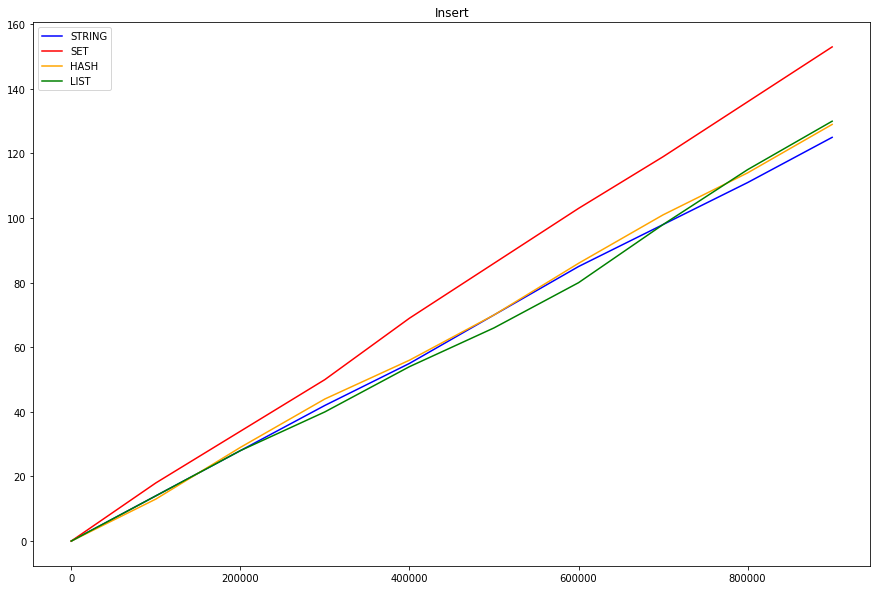

In [80]:
plt.figure(figsize=(15,10))
plt.title("Insert")
plt.plot(np.arange(0,10) * 1e+5, np.vectorize(cvrt)(string_set_times), color = 'blue', label = "STRING")
plt.plot(np.arange(0,10) * 1e+5, np.vectorize(cvrt)(sorted_set_set_times[6:16]), color = 'red', label = "SET")
plt.plot(np.arange(0,10) * 1e+5, np.vectorize(cvrt)(hash_set_times), color = 'orange', label = "HASH")
plt.plot(np.arange(0,10) * 1e+5, np.vectorize(cvrt)(list_set_times), color = 'green', label = "LIST")
plt.legend()
plt.show()

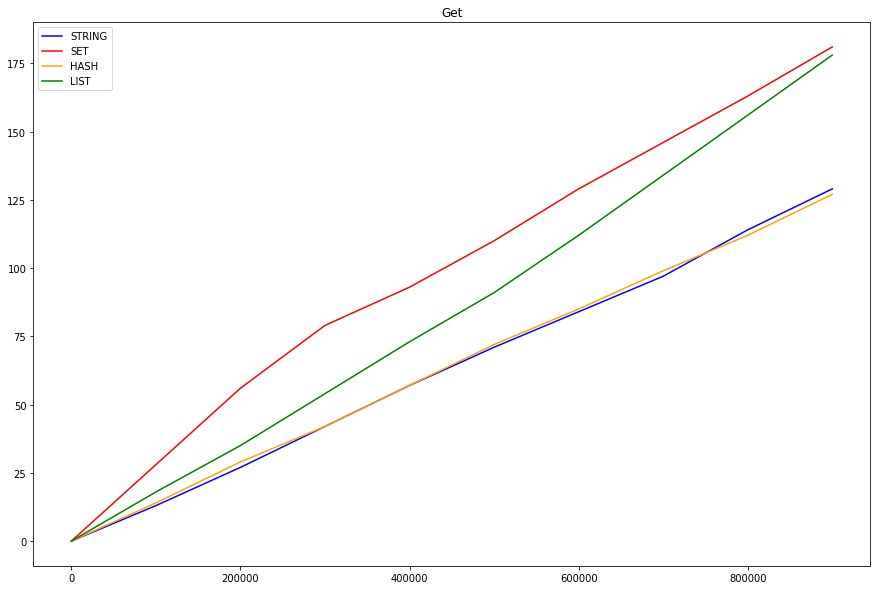

In [83]:
plt.figure(figsize=(15,10))
plt.title("Get")
plt.plot(np.arange(0,10) * 1e+5, np.vectorize(cvrt)(string_get_times), color = 'blue', label = "STRING")
plt.plot(np.arange(0,10) * 1e+5, np.vectorize(cvrt)(sorted_set_get_times), color = 'red', label = "SET")
plt.plot(np.arange(0,10) * 1e+5, np.vectorize(cvrt)(hash_get_times), color = 'orange', label = "HASH")
plt.plot(np.arange(0,10) * 1e+5, np.vectorize(cvrt)(list_get_times[2:12]), color = 'green', label = "LIST")
plt.legend()
plt.show()

Как мы видим на таких данных(все различные подряд идущие значения)

Самым медленным оказался SET

После идет LIST. 

STRING и HASH показывают себя примерно одинаково

Немного доп.инфы

LIST - быстрая вставка всегда за O(1).

Поиск долгий по середине O(N), чем ближе к краю - тем быстрее.

HASH - вставка за O(1) и достать элемент тоже за O(1). Но за это приходится платить дополнительными расходами памяти.

SET - в отличии от других структур позволяет хранить порядок. За это расходы выростают до логарифма.



In [2]:
rc = RC(host='localhost', port=6379)

ReseponseError sending "cluster slots" to redis server
Traceback (most recent call last):
  File "/home/ruslan/.local/lib/python3.8/site-packages/redis/cluster.py", line 1266, in initialize
    cluster_slots = r.execute_command("CLUSTER SLOTS")
  File "/home/ruslan/.local/lib/python3.8/site-packages/redis/client.py", line 1097, in execute_command
    return conn.retry.call_with_retry(
  File "/home/ruslan/.local/lib/python3.8/site-packages/redis/retry.py", line 32, in call_with_retry
    return do()
  File "/home/ruslan/.local/lib/python3.8/site-packages/redis/client.py", line 1098, in <lambda>
    lambda: self._send_command_parse_response(conn,
  File "/home/ruslan/.local/lib/python3.8/site-packages/redis/client.py", line 1077, in _send_command_parse_response
    return self.parse_response(conn, command_name, **options)
  File "/home/ruslan/.local/lib/python3.8/site-packages/redis/client.py", line 1113, in parse_response
    response = connection.read_response()
  File "/home/ruslan/.

RedisClusterException: ERROR sending "cluster slots" command to redis server: [host=127.0.0.1,port=6379,name=127.0.0.1:6379,server_type=None,redis_connection=Redis<ConnectionPool<Connection<host=127.0.0.1,port=6379,db=0>>>]. error: This instance has cluster support disabled

In [3]:
from rediscluster import RedisCluster

ImportError: cannot import name 'dict_merge' from 'redis.client' (/home/ruslan/.local/lib/python3.8/site-packages/redis/client.py)

C кластером возникла беда и у меня никак не получилось его запустить тут.

На ноуте что-то странное с портами.

Прикреплю ссылку на найденный репо с решением 
https://github.com/vishnudxb/docker-redis-cluster

UPD: на докере развернуть кластер получилось

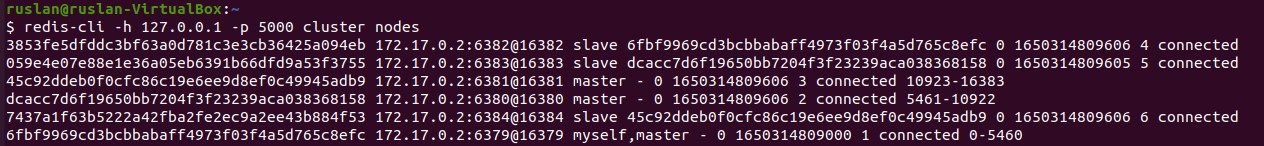